# MSc in Data Science - Data Analytics & Algorithms
# Advanced Rnn techqinues

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
from datetime import datetime  # Import the datetime class
import os

# Initialize log file
log_file = 'linear_regression_log.txt'
def log_entry(message):
    """Append a log entry to the text file with a timestamp."""
    with open(log_file, 'a') as f:
        timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        f.write(f"[{timestamp}] {message}\n")

# Clear log file if it exists and start fresh
if os.path.exists(log_file):
    os.remove(log_file)
log_entry("=== ANN Model Log Started ===")

In [5]:
global_data = pd.read_csv('./global_housing_market_extended.csv')

log_entry("Data loaded successfully.")

In [8]:
# Display the first few rows of the dataset
log_entry("Displaying the first few rows of the dataset:")
log_entry(str(global_data.head()))
log_entry("Data description:")
log_entry(str(global_data.describe()))
log_entry("Data info:")
log_entry(str(global_data.info()))




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                200 non-null    object 
 1   Year                   200 non-null    int64  
 2   House Price Index      200 non-null    float64
 3   Rent Index             200 non-null    float64
 4   Affordability Ratio    200 non-null    float64
 5   Mortgage Rate (%)      200 non-null    float64
 6   Inflation Rate (%)     200 non-null    float64
 7   GDP Growth (%)         200 non-null    float64
 8   Population Growth (%)  200 non-null    float64
 9   Urbanization Rate (%)  200 non-null    float64
 10  Construction Index     200 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 17.3+ KB


In [11]:
# check for missing values
log_entry("Checking for missing values:")
missing_values = global_data.isnull().sum()
missing_values


Country                  0
Year                     0
House Price Index        0
Rent Index               0
Affordability Ratio      0
Mortgage Rate (%)        0
Inflation Rate (%)       0
GDP Growth (%)           0
Population Growth (%)    0
Urbanization Rate (%)    0
Construction Index       0
dtype: int64

In [13]:
# Prepare features (X) and target (y)
# Drop non-numeric or irrelevant columns (Country, Year) for the model
X = global_data.drop(columns=['Country', 'Year', 'House Price Index'])  # Features
y = global_data['House Price Index']  # Target variable

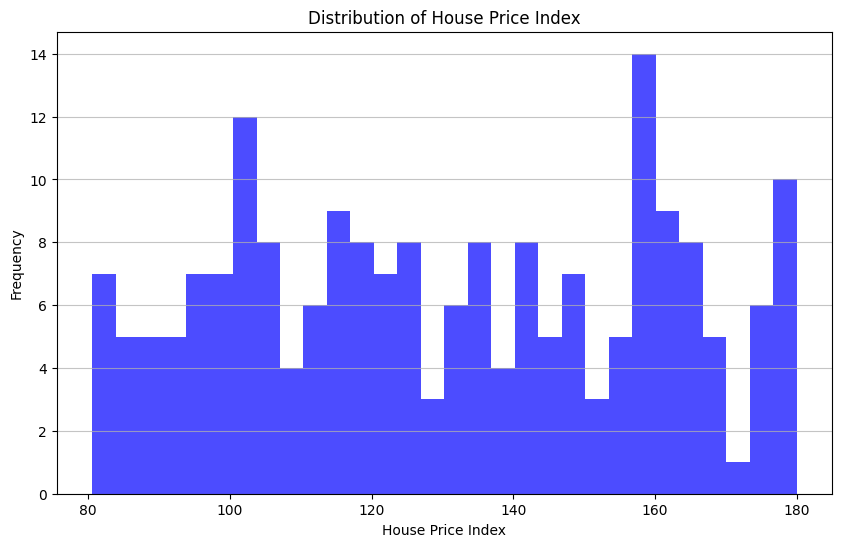

In [14]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of House Price Index')
plt.xlabel('House Price Index')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.savefig('house_price_index_distribution.png')
plt.show()


In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_entry("Data split into training and testing sets.")

In [16]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Make predictions on the test set
y_pred = model.predict(X_test)

log_entry("Model training completed and predictions made on the test set.")

In [19]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

log_entry("Model performance metrics:")
log_entry(f"Mean Squared Error (MSE): {mse:.2f}")
log_entry(f"R^2 Score: {r2:.2f}")




Model Performance:
Mean Squared Error (MSE): 930.75
R^2 Score: -0.01


In [20]:
# Display coefficients for interpretation
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nFeature Coefficients:")
print(coefficients)

log_entry("Feature coefficients:")


Feature Coefficients:
                 Feature  Coefficient
0             Rent Index     0.103894
1    Affordability Ratio    -1.745443
2      Mortgage Rate (%)     0.724044
3     Inflation Rate (%)    -0.181118
4         GDP Growth (%)    -0.776167
5  Population Growth (%)     3.168440
6  Urbanization Rate (%)    -0.145125
7     Construction Index    -0.167461


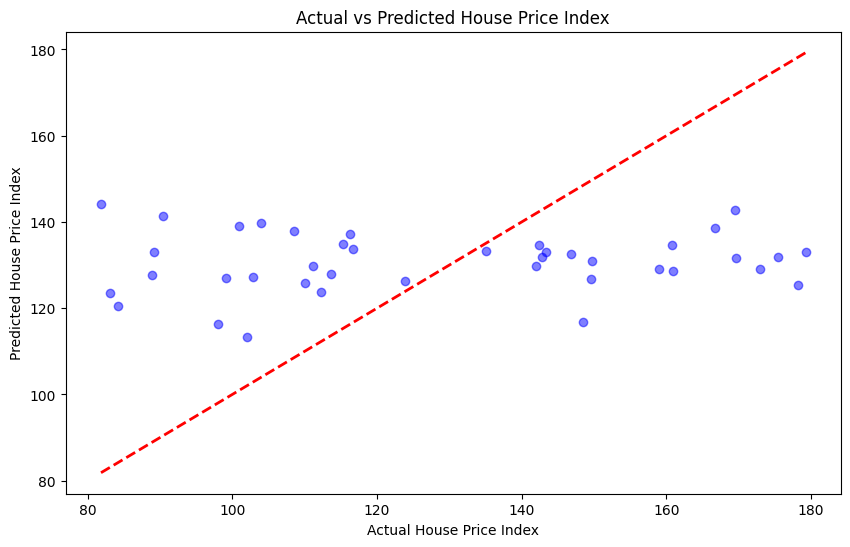

In [21]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual House Price Index')
plt.ylabel('Predicted House Price Index')
plt.title('Actual vs Predicted House Price Index')
plt.show()

In [22]:
# save the model
import pickle
model_filename = 'linear_regression_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(model, f)
    
log_entry(f"Model saved to {model_filename}")

# Save the coefficients to a CSV file for further analysis
coefficients_filename = 'feature_coefficients.csv'
coefficients.to_csv(coefficients_filename, index=False)
log_entry(f"Feature coefficients saved to {coefficients_filename}")
